<a href="https://colab.research.google.com/github/yoohw0317/DAPproject/blob/main/DAP_project(Hayatt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import re
from wordcloud import WordCloud 

In [ ]:
df = pd.read_excel("https://github.com/yoohw0317/DAPproject/blob/main/data_hayatt.xlsx?raw=true")
df = df[['score', 'review']]
df.dropna
df

,score,review
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰..."
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...
...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러..."
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔..."
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트..."
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...


In [ ]:
def regularExpression (text):
  exp = re.compile('[^ 가-힣]')
  return exp.sub('', text);

해당 test에 한글을 제외한 모든 것들이 걸러지는지 시험하기 위해 한국어를 제외한 대부분의 모든 것들을 넣어줍니다.

1. 숫자

2. ㅠㅠ ㅋㅋ와 같은 이모티콘

3. .,!와 같은 기호

4. 하트, 별과 같은 이모티콘

In [ ]:
test='12월 15일에 테스트 해봅니당...ㅠㅠㅠㅠ 제발 성공하기를 흑ㅠㅠㅠㅠㅠㅠㅠㅠㅎㅎㅎㅎㅎㅎ, plz plz success...!!!!! 다 지워져라 얍★'
regularExpression(test)

'월 일에 테스트 해봅니당 제발 성공하기를 흑    다 지워져라 얍'

해당 환경설정은 사용자에 맞는 환경설정을 사용해야합니다.

그렇지 않으면 상상치도 못한 오류에 직면하게 될 수도 있습니다.

코드 작성자의 환경은 다음과 같습니다.

Python 3.8.8

java 17.0.1 2021-10-19 LTS

Java(TM) SE Runtime Environment (build 17.0.1+12-LTS-39)

Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)

JPype1-1.3.0-cp38-cp38-win_amd64.whl



In [ ]:
!apt-get update 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.9 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
from konlpy.tag import Okt
from collections import Counter

만약 에러가 발생한다면 해당 코드에 들어가서 에러가 나는 부분을 지워주면 정상 실행될 때도 있습니다.


이게 무슨소린가 싶겠지만 직접 해본사람은 이해할 수 있습니다.

In [ ]:
test = regularExpression(df['review'][0])
test
okt = Okt()
testnouns = okt.nouns(test)
testnouns #정상 추출 확인!

['뷰', '추천', '숙소', '근처', '곳', '위치']

말뭉치를 생성

말뭉치: 자연어처리에서 자연어의 집합

In [ ]:
totalCorpus = "".join(df['review'].tolist())
totalCorpus[:40]

'깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소'

In [ ]:
totalCorpus = regularExpression(totalCorpus)
totalCorpus[:40]

'깔끔하고 청결하고 뷰도 좋습니다 편하게 쉬고자 한다면 추천합니다 숙소 근'

In [ ]:
nouns = okt.nouns(totalCorpus)
print(nouns[:20])

['뷰', '추천', '숙소', '근처', '곳', '위치', '여자친구', '기념일', '겸', '파크', '하얏트', '방문', '직원', '친절', '방', '최상', '가격', '다른', '타', '호텔']


In [ ]:
totalcount_notFiltered = Counter(nouns)
print(totalcount_notFiltered.most_common(20))

[('호텔', 842), ('뷰', 714), ('직원', 477), ('부산', 468), ('객실', 438), ('서비스', 426), ('하얏트', 392), ('파크', 318), ('광안대교', 302), ('시설', 296), ('조식', 292), ('이용', 259), ('수', 252), ('것', 250), ('방문', 247), ('수영장', 243), ('최고', 233), ('매우', 212), ('룸', 205), ('위치', 195)]


https://www.ranks.nl/stopwords/korean

불용어 사전 링크를 참고해서 엑셀로 정리하여 사용

In [ ]:
stopWords = pd.read_excel('https://github.com/yoohw0317/DAPproject/blob/main/stopwords.xlsx?raw=true').values.tolist()

In [ ]:
filteredNouns = [x for x in nouns if [x] not in stopWords]
totalCount = Counter(filteredNouns)
print(totalCount.most_common(20))

[('뷰', 714), ('직원', 477), ('부산', 468), ('객실', 438), ('서비스', 426), ('하얏트', 392), ('파크', 318), ('광안대교', 302), ('시설', 296), ('조식', 292), ('이용', 259), ('수', 252), ('방문', 247), ('수영장', 243), ('최고', 233), ('매우', 212), ('룸', 205), ('위치', 195), ('곳', 191), ('여행', 189)]


**뷰, 룸, 방 **을 제외하고는 한 글자가 의미가 없어보임. filter 다시 해봅시다 

이번에는 뷰, 룸, 방을 제외한 한 글자는 모두 사라지도록


In [ ]:
filteredNouns = [x for x in filteredNouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
totalCount = Counter(filteredNouns)
print(filteredNouns[:20])
print(totalCount.most_common(20))

['뷰', '추천', '숙소', '근처', '위치', '여자친구', '기념일', '파크', '하얏트', '방문', '직원', '친절', '방', '최상', '가격', '편이', '고재', '방문', '의사', '이유']
[('뷰', 714), ('직원', 477), ('부산', 468), ('객실', 438), ('서비스', 426), ('하얏트', 392), ('파크', 318), ('광안대교', 302), ('시설', 296), ('조식', 292), ('이용', 259), ('방문', 247), ('수영장', 243), ('최고', 233), ('매우', 212), ('룸', 205), ('위치', 195), ('여행', 189), ('정말', 184), ('해운대', 170)]


이 과정을 함수로 표현합니다.

언젠가 쓸 일이 있을 겁니다.

In [ ]:
def corpusToNouns (text):
  text = regularExpression(text)
  nouns = okt.nouns(text)
  nouns = [x for x in nouns if [x] not in stopWords]
  nouns = [x for x in nouns if len(x) > 1 or x == '뷰' or x == '룸' or x == '방']
  nouns_counter = Counter(nouns)
  return nouns_counter

그래프에 사용할 폰트를 업로드합니다.

폰트는 한글이 지원되는 폰트면 무엇이든 가능합니다.

대신 폰트의 이름은 'this'로 고정해주세요 (확장자가 포함된다면 this.ttf)


In [ ]:
from google.colab import files
files.upload()

여기까지 사실 필요한 데이터는 대부분 뽑은거죠.


이제 데이터를 이용해서 호텔의 리뷰를 분석해봅시다.


우선적으로 아래에 있는 코드 2줄은 한글 폰트를 적용하는 변수 이름입니다.



In [ ]:
font_label=fm.FontProperties(fname='/content/this.ttf', size=20)
font_title=fm.FontProperties(fname='/content/this.ttf', size=30)
font_xticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_yticks=fm.FontProperties(fname='/content/this.ttf', size=12)
font_bar=fm.FontProperties(fname='/content/this.ttf', size=15)

1. 전체적인 내용에서 주요 단어 빈도수 분석

파싱된 명사의 개수는 중복을 포함해서 10317개로 단어에 대한 비율이 너무 작게 나타날 우려가 존재합니다.

그래서 상위 50위의 단어들을 파악해봅시다.


In [ ]:
sum(totalCount.values())

22864

In [ ]:
top50 = totalCount.most_common(50)
x = [x for (x, y) in top50]
y = [y for (x, y) in top50]
colors_top50 = sns.color_palette('Spectral', 50)

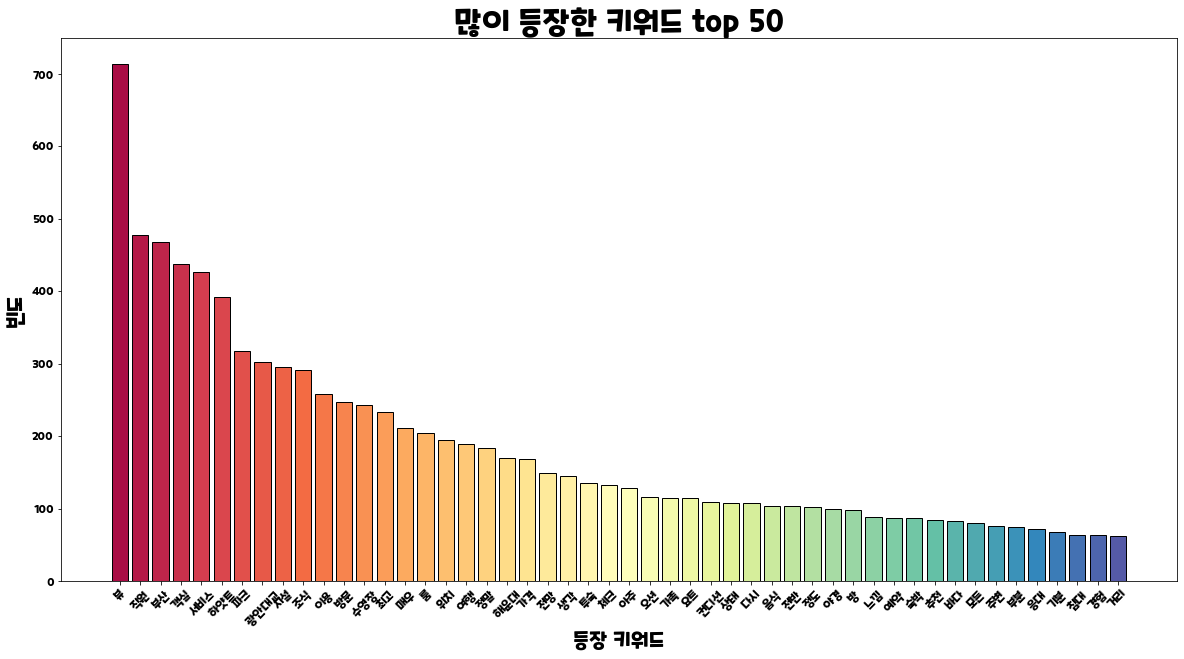

In [ ]:
plt.figure(figsize = (20, 10))
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

워드클라우드 분석은 일부로 전체 단어를 놓고 했습니다.

어차피 워드클라우드에서 너무 많다고 여겨지면 알아서 컷 해줍니다.

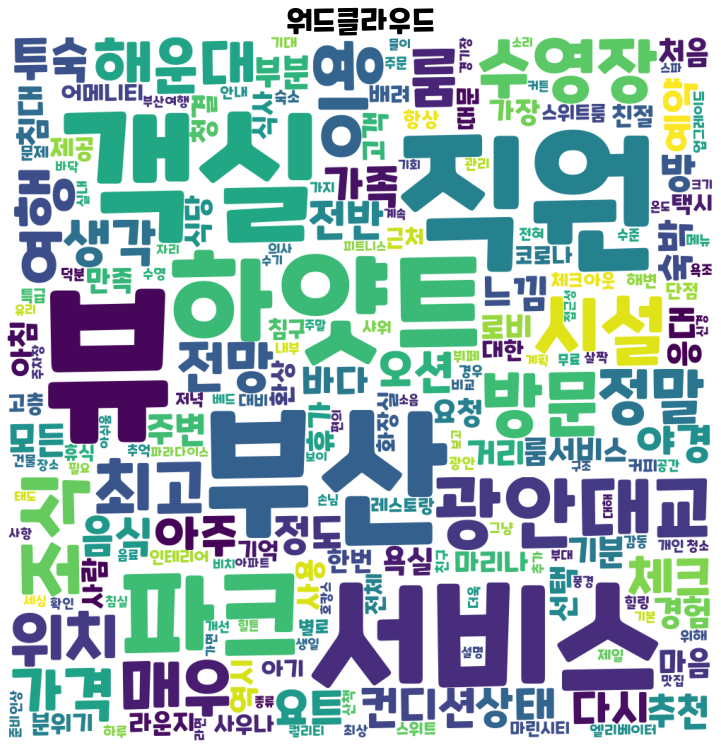

In [ ]:
wordCloud = WordCloud(max_font_size=250, font_path='/content/this.ttf', background_color='white', width=1000, height=1000).generate_from_frequencies(totalCount)
plt.figure(figsize=(13, 13))
plt.imshow(wordCloud)
plt.title("워드클라우드", fontproperties=font_title)
plt.axis('off')
plt.show()

 점수별 분포와 점수에 따른 단어 빈도수 체크




In [ ]:
rating = Counter(df['score'])
rating = sorted(rating.items())
rating

[(1, 38), (2, 31), (3, 55), (4, 271), (5, 905)]

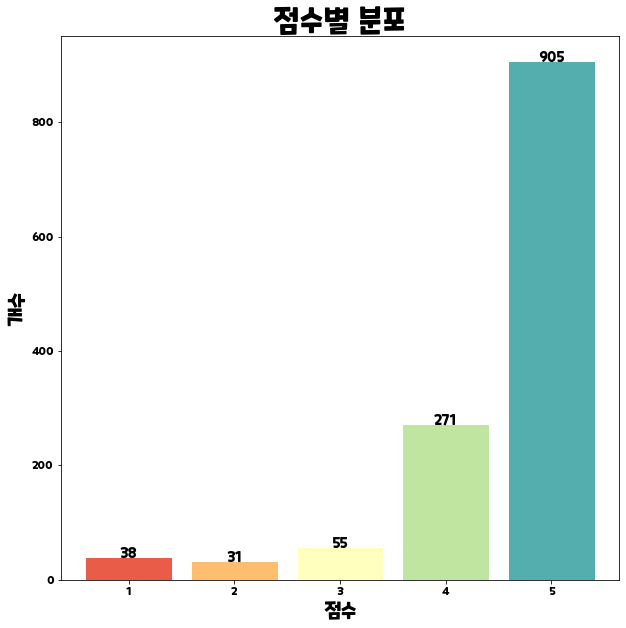

In [ ]:
colors_rating = sns.color_palette('Spectral', 5)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()
x = [x for (x, y) in rating]
y = [y for (x, y) in rating]
bars = plt.bar(x, y, color=colors_rating, edgecolor=colors_rating)

barText_rating = y
for i, b in enumerate(bars):
  ax.text(b.get_x()+b.get_width() * (1/2), b.get_height()+0.2, barText_rating[i], ha='center', fontsize=13, fontproperties=font_bar)

plt.xlabel("점수",fontproperties=font_label)
plt.ylabel("개수",fontproperties=font_label)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)
plt.title("점수별 분포",fontproperties=font_title)
plt.show()

선호 리뷰와 비선호 리뷰를 분석해봅시다.

In [ ]:
likes =  df[df['score']>3]
dislikes = df[df['score'] <= 3]
likesCorpus = "".join(likes['review'])
likesNouns = corpusToNouns("".join(likesCorpus))
dislikesCorpus = "".join(dislikes['review'])
dislikesNouns = corpusToNouns("".join(dislikesCorpus))

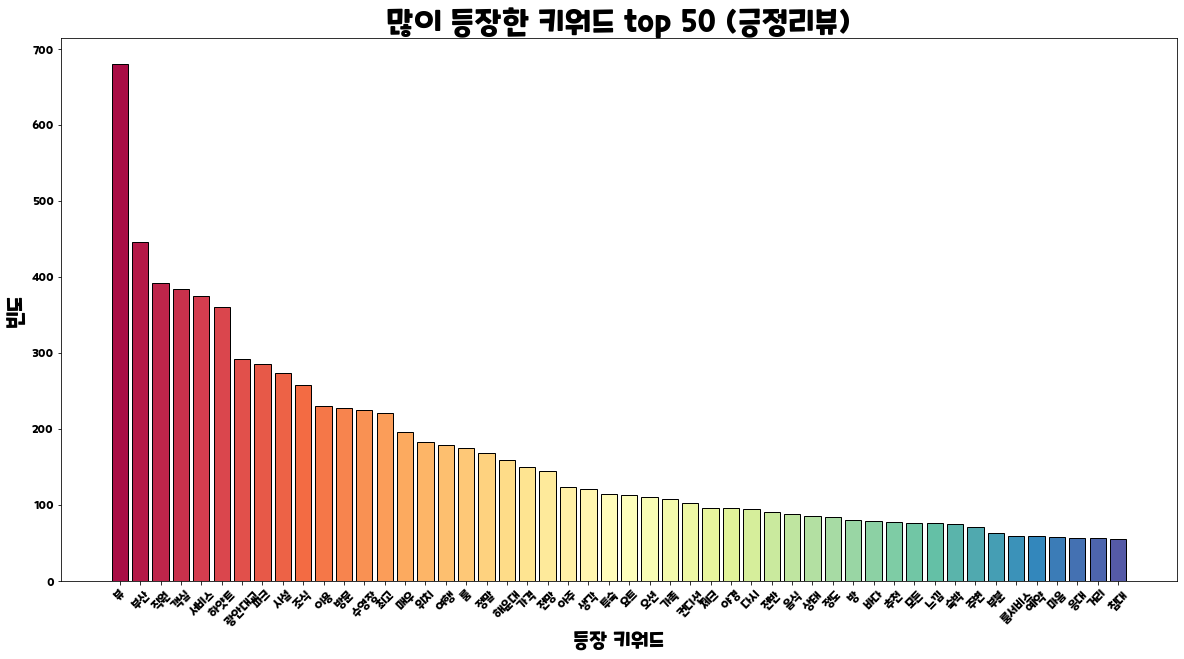

In [ ]:
likes_top50 = likesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in likes_top50]
y = [y for (x, y) in likes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (긍정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

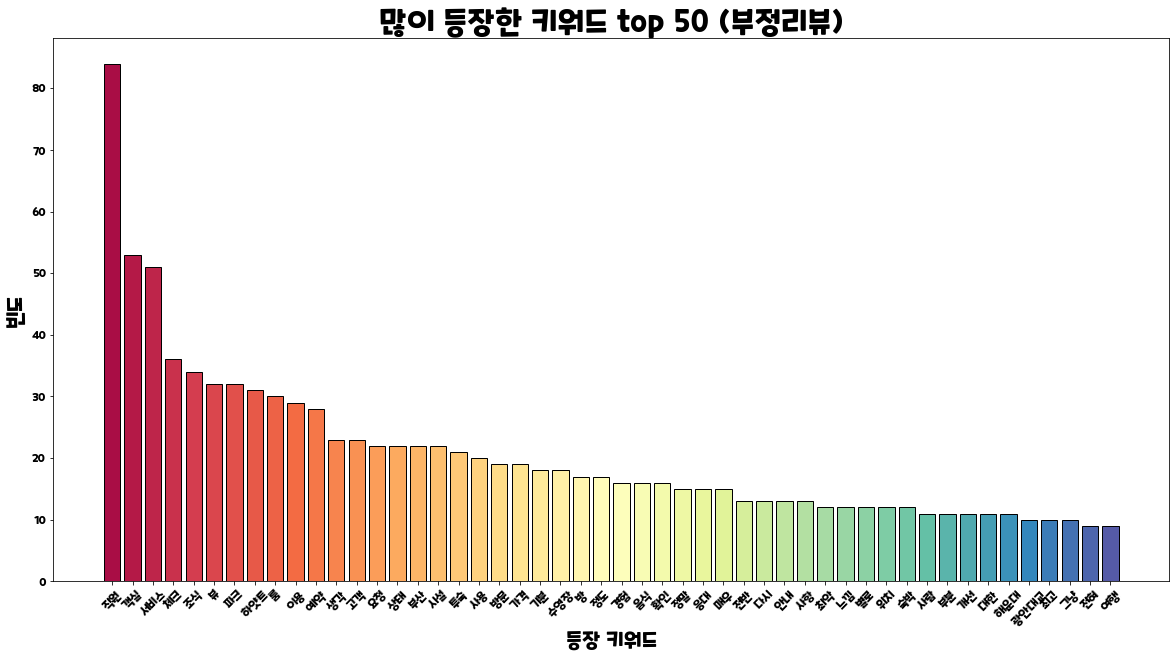

In [ ]:
dislikes_top50 = dislikesNouns.most_common(50)
plt.figure(figsize = (20, 10))
x = [x for (x, y) in dislikes_top50]
y = [y for (x, y) in dislikes_top50]
plt.bar(x, y, color=colors_top50, edgecolor='black')
plt.xlabel("등장 키워드",fontproperties=font_label)
plt.ylabel("빈도",fontproperties=font_label)
plt.title("많이 등장한 키워드 top 50 (부정리뷰)",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks, rotation=45)
plt.yticks(fontproperties=font_yticks)
plt.show()

단순히 이거로만 본다면 직원과 객실, 서비스가 부정적인 것으로 보여진다.

하지만 해당 단어는 긍정적인 리뷰에서도 많이 볼 수 있기 때문에 직원, 객실이 부정적인 영향을 미치는지 알 수없다.


여기서 정상적인 감성 분석을 위해 TF-IDF 모델을 사용한다.

우선적으로 bag of Words 벡터를 생성


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(tokenizer = lambda x : corpusToNouns(x))
reviewList = df['review'].tolist()
bow_vect = vect.fit_transform(reviewList)
word_list = vect.get_feature_names()
count_list = bow_vect.toarray().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(word_list[:20])
print(count_list[:20])
bow_vect.shape

['가게', '가격', '가구', '가기', '가까이', '가끔', '가나', '가내', '가능', '가능성', '가닥', '가도', '가독성', '가드', '가득', '가든', '가량', '가로', '가림', '가면']
[ 19 157   2  17   6   8   1   1   6   3   1   6   1   3   4   1   1   3
   2  20]


(1300, 3238)

In [ ]:
word_count_dict = dict(zip(word_list, count_list))

boW 벡터와 관련하여 TF-IDF 변환을 진행

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(bow_vect)

In [ ]:
print(tf_idf_vect.shape)
print(tf_idf_vect[0])

(1300, 3238)
  (0, 2664)	0.4534043692003677
  (0, 2030)	0.35358666073304185
  (0, 1509)	0.5631540146700895
  (0, 1227)	0.2270290044989896
  (0, 304)	0.5483760919467877


In [ ]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}

위에서 나누어준 likes 와 dislikes를 가지고 Training을 해봅시다.

In [ ]:
import copy
df_test = copy.deepcopy(df)
def likeDislike(score):
  if score >= 4:
    return 1
  else:
    return 0
df_test['likeDislike'] = df_test['score'].apply(lambda x : likeDislike(x))
df_test

,score,review,likeDislike
0,5,깔끔하고 청결하고 뷰도 좋습니다. 편하게 쉬고자 한다면 추천합니다. 숙소 근처가 조...,1
1,5,여자친구와 기념일 겸 파크하얏트에 방문을 하였습니다.직원의 친절도 방의 깨끗함 최상...,1
2,5,아주 훌륭하고 좋음 비싼 이유가 있다 만족 너무 추천 가격빼고 ! 어메니티는 좀 더...,1
3,5,"부산 파크하얏트도 역시 파크하얏트다운 좋은 로케, 서비스 제공하여 만족했습니다. 뷰...",1
4,1,객실 도어락이 고장나서 투숙기간 동안 두번 수리 기사가 방문해서 문고리 뜯어 고침 ...,0
...,...,...,...
1295,5,"내 마음에 드는 호텔 입니다. 모든 것이 좋은: 전면 유리창, 좋은 질감 이 부드러...",1
1296,4,"파크 하얏트 부산 은 전반적으로 적절한. 그러나, 한 가족이 아니다 - 친절한 호텔...",1
1297,5,"확실히 최고의 호텔이었어요. 다른 도시 마법사와는 달리, 부산의 호텔은 파크 하얏트...",1
1298,5,파크 하얏트 에서 숙박을 즐길 수 있는. 직원들은 매우 친절하고 세심한. 방은 멋진...,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
x = tf_idf_vect
y = df_test['likeDislike']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
logi = LogisticRegression(random_state = 0)
logi.fit(x_train, y_train)
y_pred = logi.predict(x_test)

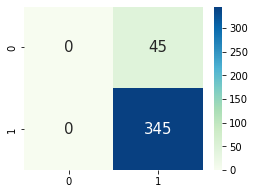

accurancy:  0.8846153846153846
precision:  0.8846153846153846
recall:  1.0
F1:  0.9387755102040816


In [ ]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15}, cmap='GnBu', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

In [ ]:
df_test['likeDislike'].value_counts()

1    1176
0     124
Name: likeDislike, dtype: int64

In [ ]:
positiveRandom = df_test[df_test['likeDislike'] == 1].sample(124, random_state=12).index.tolist()
negativeRandom = df_test[df_test['likeDislike'] == 0].sample(124, random_state=12).index.tolist()

In [ ]:
random = positiveRandom + negativeRandom
x = tf_idf_vect[random]
y = df_test['likeDislike'][random]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
logi2 = LogisticRegression(random_state = 0)
logi2.fit (x_train, y_train)
y_predict = logi2.predict(x_test)

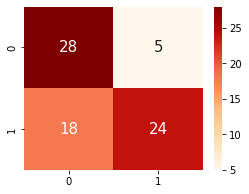

accurancy:  0.6933333333333334
precision:  0.8275862068965517
recall:  0.5714285714285714
F1:  0.676056338028169


In [ ]:
confusion = confusion_matrix(y_true = y_test, y_pred = y_predict)
plt.figure(figsize=(4,3))
sns.heatmap(confusion, annot=True, annot_kws={'size':15 }, cmap='OrRd', fmt='.10g')
plt.show()
print('accurancy: ', accuracy_score(y_test, y_predict))
print('precision: ', precision_score(y_test, y_predict))
print('recall: ', recall_score(y_test, y_predict))
print('F1: ', f1_score(y_test, y_predict))

(array([-0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Text major ticklabel objects>)

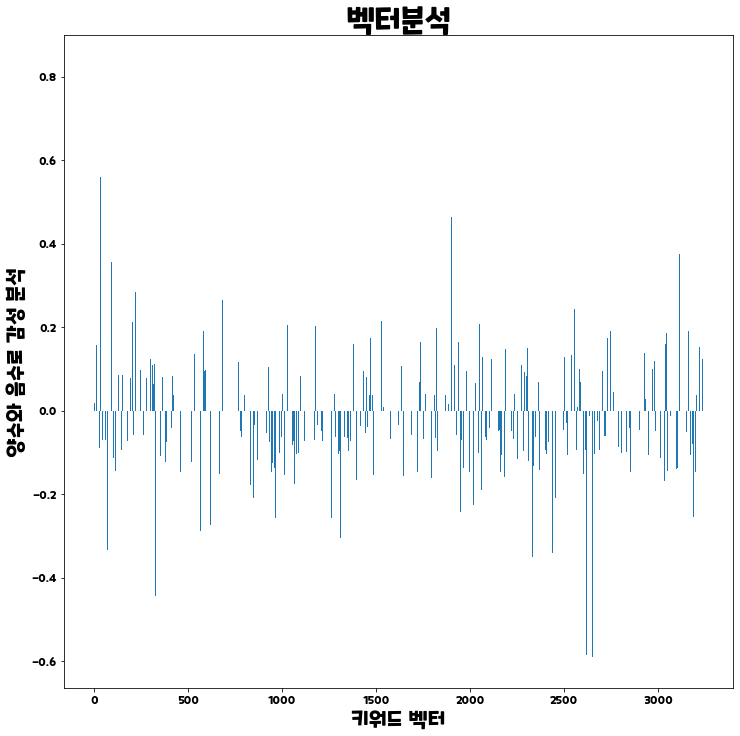

In [ ]:
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize= (12, 12))
plt.bar(range(len(logi2.coef_[0])), logi2.coef_[0])
plt.xlabel("키워드 벡터",fontproperties=font_label)
plt.ylabel("양수와 음수로 감성 분석",fontproperties=font_label)
plt.title("벡터분석",fontproperties=font_title)
plt.xticks(fontproperties=font_xticks)
plt.yticks(fontproperties=font_yticks)

In [ ]:
pos_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = True)
neg_index = sorted(((value, index)for index, value in enumerate(logi2.coef_[0])),reverse = False)

In [ ]:
for x in pos_index[:30]:
  print(invert_index_vectorizer[x[1]], x[0])

뷰 0.8274446079074466
부산 0.6754336876705177
수영장 0.6559728856275538
광안대교 0.5897698201646508
친철 0.5630370040998534
가족 0.5590556001094473
매우 0.5119266480001787
부페 0.48817421279881085
여행 0.47567874243877134
위치 0.46726774057903075
야경 0.4641446346010864
오션 0.4640066223530627
아주 0.44380314147574185
인상 0.4337857720347399
방문 0.42763101227874317
바다 0.4175780624108079
주변 0.4135780295388476
요트 0.40066502858545205
전망 0.3919824030457744
해운대 0.37540149416885626
마루 0.3635463480883282
메이크업 0.36276693253473813
어메니티 0.35955375161354225
마린시티 0.35820929023949105
거실 0.3561841213974937
마리나 0.3530175632855178
다운 0.34921436641938536
구조 0.34746833388133047
부부 0.34433524939408156
유명 0.3441480688655326


In [ ]:
for x in neg_index[:40]:
  print(invert_index_vectorizer[x[1]], x[0])

대비 -0.5927166971631085
최악 -0.5910921856999763
체크 -0.5842734201384139
기분 -0.5640266316313435
대한 -0.5317438480391272
고객 -0.512366822991565
별로 -0.5119004457641445
전반 -0.5074133622926158
태도 -0.5001438805612359
기대 -0.4436345044978415
불만족 -0.4246671283041531
지불 -0.3895594752181111
이해 -0.3783695919872927
힐튼 -0.3781776047560665
고장 -0.3703608142472523
가격 -0.36653825100635756
전혀 -0.35034032286886146
종류 -0.3399643152190145
청소 -0.3376523720607664
강력 -0.33430929046161123
파라다이스 -0.3313076912202923
입구 -0.3184593159381363
우왕좌왕 -0.3139096305944142
상태 -0.30888911187226403
제대로 -0.30629840483587023
사항 -0.30604135364463464
말투 -0.30516464285915024
나머지 -0.3008276932533513
개선 -0.295305336935491
대해 -0.2877631726916132
실망 -0.28645017287189334
경험 -0.28186870708878475
상황 -0.2788998853994176
비치 -0.27574570767878676
동반 -0.2745048924967233
친절 -0.2668925199436476
가요 -0.2657271841365657
예약 -0.26441207627252916
비즈니스 -0.2624512312573082
특유 -0.25855594930966974
